# Ordinary differential equations

Julia now has perhaps the best suite of ordinary differential equation solvers of *any* platform.
It also has SDEs, and other related types of equation. There are also various efforts for solving different kinds of PDEs.

In [1]:
using DifferentialEquations

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1186


Quiero resolver la ecuación diferencial ordinaria (EDO ; ODE en inglés)

$\dot{x} = f(x)$

e.g.

$\dot{x} = \frac{dx}{dt} = x = f(x)$

In [9]:
f(x) = x

f (generic function with 2 methods)

In [6]:
x0 = 1.0  # condición inicial 

rango_tiempo = (0.0, 5.0)

prob = ODEProblem(f, x0, rango_tiempo)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 5.0)
u0: 1.0

In [7]:
prob.u0

1.0

In [8]:
soln = solve(prob)

MethodError: MethodError: no method matching f(::Float64, ::Nothing, ::Float64)
Closest candidates are:
  f(::Any) at In[4]:1

In [10]:
f(x, p, t) = x

f (generic function with 2 methods)

In [11]:
prob = ODEProblem(f, x0, rango_tiempo)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 5.0)
u0: 1.0

In [16]:
soln = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 11-element Array{Float64,1}:
 0.0                
 0.10001999200479662
 0.3480207301142381 
 0.6830525879469294 
 1.0884530337523515 
 1.5745318661408754 
 2.1328296536985896 
 2.761810503884549  
 3.4547668319661535 
 4.206424273690445  
 5.0                
u: 11-element Array{Float64,1}:
   1.0               
   1.105193012902056 
   1.4162616068141611
   1.9799123187558105
   2.9696760820947734
   4.828477665307822 
   8.438695296095625 
  15.82839570327906  
  31.650562571822917 
  67.11469797321426  
 148.40781152863298  

In [17]:
typeof(soln)

OrdinaryDiffEq.ODECompositeSolution{Float64,1,Array{Float64,1},Nothing,Nothing,Array{Float64,1},Array{Array{Float64,1},1},ODEProblem{Float64,Tuple{Float64,Float64},false,Nothing,ODEFunction{false,typeof(f),LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},Nothing,DiffEqBase.StandardODEProblem},CompositeAlgorithm{Tuple{Tsit5,Rosenbrock23{0,false,LinSolveFactorize{typeof(LinearAlgebra.lu!)},DataType}},AutoSwitch{Tsit5,Rosenbrock23{0,false,LinSolveFactorize{typeof(LinearAlgebra.lu!)},DataType},Rational{Int64},Float64}},OrdinaryDiffEq.CompositeInterpolationData{ODEFunction{false,typeof(f),LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},Array{Float64,1},Array{Float64,1},Array{Array{Float64,1},1},OrdinaryDiffEq.CompositeCache{Tuple{OrdinaryDiffEq.Tsit5ConstantCache{Float64,Float64},OrdinaryDiffEq.Rosenbrock23ConstantCache{Float64,DiffEqDiffTools.TimeDerivativeWrapper{ODEFunction{false,typeof

In [18]:
soln

retcode: Success
Interpolation: Automatic order switching interpolation
t: 11-element Array{Float64,1}:
 0.0                
 0.10001999200479662
 0.3480207301142381 
 0.6830525879469294 
 1.0884530337523515 
 1.5745318661408754 
 2.1328296536985896 
 2.761810503884549  
 3.4547668319661535 
 4.206424273690445  
 5.0                
u: 11-element Array{Float64,1}:
   1.0               
   1.105193012902056 
   1.4162616068141611
   1.9799123187558105
   2.9696760820947734
   4.828477665307822 
   8.438695296095625 
  15.82839570327906  
  31.650562571822917 
  67.11469797321426  
 148.40781152863298  

In [19]:
soln.t

11-element Array{Float64,1}:
 0.0                
 0.10001999200479662
 0.3480207301142381 
 0.6830525879469294 
 1.0884530337523515 
 1.5745318661408754 
 2.1328296536985896 
 2.761810503884549  
 3.4547668319661535 
 4.206424273690445  
 5.0                

In [20]:
using Plots

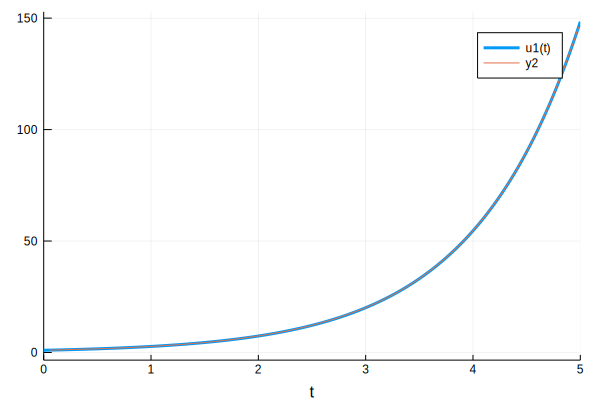

In [22]:
plot(soln)
plot!(exp)

In [ ]:
prob = ODEProblem(f, u0, tspan, p)

To solve an ODE of the form

$$\dot{\mathbf{x}} = \mathbf{f}_\mathbf{\mu}(\mathbf{x}, t),$$
where $\mathbf{\mu}$ is a vector of parameters, we do the following:

In [25]:
]add ParameterizedFunctions

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed ParameterizedFunctions ─ v4.1.1
 Installed SymEngine ────────────── v0.5.0
  Updating `~/.julia/environments/v1.1/Project.toml`
  [65888b18] + ParameterizedFunctions v4.1.1
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [65888b18] + ParameterizedFunctions v4.1.1
  [123dc426] + SymEngine v0.5.0
  Building SymEngine → `~/.julia/packages/SymEngine/6KyFJ/deps/build.log`


In [26]:
using ParameterizedFunctions

┌ Info: Precompiling ParameterizedFunctions [65888b18-ceab-5e60-b2b9-181511a3b968]
└ @ Base loading.jl:1186


In [28]:
α = 3   # \alpha<TAB>

3

In [29]:
2α

6

In [30]:
σ² = 10

10

In [31]:
σ

UndefVarError: UndefVarError: σ not defined

In [33]:
g = @ode_def Lorenz begin
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
end σ ρ β

(::Lorenz{getfield(Main, Symbol("##19#23")),getfield(Main, Symbol("##20#24")),getfield(Main, Symbol("##21#25")),Nothing,Nothing,getfield(Main, Symbol("##22#26")),Expr,Expr}) (generic function with 2 methods)

In [34]:
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 20.0)

p = [10.0, 28.0, 8/3]  # classical parameter values for the Lorenz attractorplot(sol,vars=(1,2,3))


prob = ODEProblem(g, u0, tspan, p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 20.0)
u0: [1.0, 0.0, 0.0]

Having defined an object `ODEProblem` with the data of the ODE, we now solve it:

In [41]:
methods(solve)

# 11 methods for generic function "solve":
[1] solve(prob::DiffEqBase.AbstractODEProblem{uType,tType,isinplace}, Alg::DiffEqBase.InternalEuler.FwdEulerAlg; dt, tstops, kwargs...) where {uType, tType, isinplace} in DiffEqBase.InternalEuler at /Users/dpsanders/.julia/packages/DiffEqBase/cPqrj/src/internal_euler.jl:21
[2] solve(prob::DiffEqBase.AbstractODEProblem{uType,tType,isinplace}, Alg::DiffEqBase.InternalEuler.BwdEulerAlg; dt, tstops, tol, maxiter, kwargs...) where {uType, tType, isinplace} in DiffEqBase.InternalEuler at /Users/dpsanders/.julia/packages/DiffEqBase/cPqrj/src/internal_euler.jl:57
[3] solve(prob::DiffEqBase.AbstractNoiseProblem, ::Nothing, args...; dt, kwargs...) in DiffEqNoiseProcess at /Users/dpsanders/.julia/packages/DiffEqNoiseProcess/zaKGX/src/solve.jl:1
[4] solve(prob::DiffEqBase.AbstractNoiseProblem, args...; dt, kwargs...) in DiffEqNoiseProcess at /Users/dpsanders/.julia/packages/DiffEqNoiseProcess/zaKGX/src/solve.jl:4
[5] solve(jump_prob::JumpProblem, alg::SSAStepper; kwargs...) in DiffEqJump at /Users/dpsanders/.julia/packages/DiffEqJump/DrmPD/src/SSA_stepper.jl:27
[6] solve(jump_prob::JumpProblem, alg::SimpleTauLeaping; seed, dt) in DiffEqJump at /Users/dpsanders/.julia/packages/DiffEqJump/DrmPD/src/simple_regular_solve.jl:8
[7] solve(jump_prob::JumpProblem, alg::RegularSSA) in DiffEqJump at /Users/dpsanders/.julia/packages/DiffEqJump/DrmPD/src/simple_regular_solve.jl:54
[8] solve(prob::DiffEqBase.AbstractMonteCarloProblem) in DiffEqMonteCarlo at /Users/dpsanders/.julia/packages/DiffEqMonteCarlo/c9ztK/src/solve.jl:21
[9] solve(prob::DiffEqBase.AbstractMonteCarloProblem, alg::Union{Nothing, DEAlgorithm}) in DiffEqMonteCarlo at /Users/dpsanders/.julia/packages/DiffEqMonteCarlo/c9ztK/src/solve.jl:21
[10] solve(prob::DiffEqBase.AbstractMonteCarloProblem, alg::Union{Nothing, DEAlgorithm}, collect_result::Type{Val{T}}; num_monte, batch_size, pmap_batch_size, parallel_type, kwargs...) where T in DiffEqMonteCarlo at /Users/dpsanders/.julia/packages/DiffEqMonteCarlo/c9ztK/src/solve.jl:21
[11] solve(prob::DiffEqBase.DEProblem, args...; kwargs...) in DiffEqBase at /Users/dpsanders/.julia/packages/DiffEqBase/cPqrj/src/solve.jl:27

In [35]:
soln = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 224-element Array{Float64,1}:
  0.0                  
  3.5678604836301404e-5
  0.0003924646531993154
  0.0032624016752212923
  0.00905808176456279  
  0.0169564955927642   
  0.02769000245764448  
  0.04185634375662893  
  0.06024025665362463  
  0.0836852441654334   
  0.11336451506889586  
  0.14862131186030308  
  0.18703929175446188  
  ⋮                    
 19.099312525081025    
 19.17475380855598     
 19.259682843054826    
 19.350066640523412    
 19.439468007409022    
 19.53908816139435     
 19.626213408114115    
 19.704360030105654    
 19.78756082491842     
 19.872052279030154    
 19.95865785434881     
 20.0                  
u: 224-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]                    
 [0.999643, 0.000998805, 1.78143e-8]
 [0.996105, 0.0109654, 2.14696e-6]  
 [0.969359, 0.0897704, 0.000143801] 
 [0.924204, 0.242289, 0.00104616]   
 [0.880045, 0.438737, 0.00342427]   
 [0.848

Here, a default numerical method was chosen based on features of the ODE. Of course, we can also specify the method to use.

In [13]:
using Plots

`DifferentialEquations.jl` exploits a unique feature of `Plots.jl`, namely **plot recipes**. 
This is a way in which a package can define *how to plot* its own objects, using facilities provided by `Plots.jl`. In this way, a package can jack into the `Plots.jl` machinery, without the need to redefine all kinds of plotting from scratch.

In [17]:
plot(soln, lw=1)

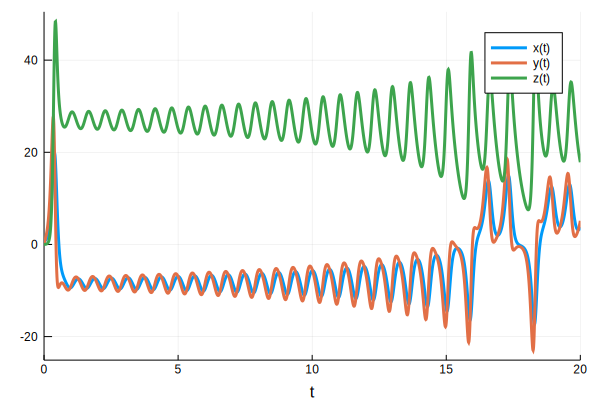

In [37]:
plot(soln)

By default, each variable is shown separately as a function of time.

Instead, we can specify which variables to plot:

In [18]:
plotly()

Plots.PlotlyBackend()

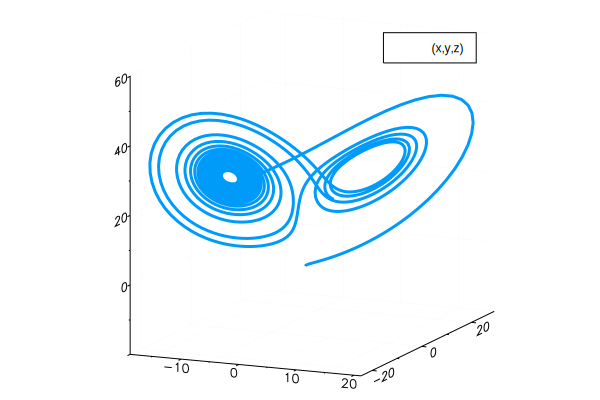

In [38]:
plot(soln, vars = (1, 2, 3))

In [39]:
plotly()

Plots.PlotlyBackend()

In [40]:
plot(soln, vars = (1, 2, 3))